# Контрольное домашнее задание

Дисциплина: АиСД-1

Студент: Насекин Иван Дмитриевич

Группа: 252

In [1]:
import random
import time
import pandas as pd
import matplotlib.pyplot as plt

## Реализация алгоритмов сортировки

сделал две версии каждой сортировки - одна для замера времени, вторая для подсчета операций


### 1. Сортировка выбором

на каждой итерации ищем минимум в неотсортированной части и ставим на текущую позицию

всегда делает одинаковое количество сравнений, поэтому O(n^2) независимо от данных

In [2]:
def selectionSort(arr):
    n = len(arr)
    for i in range(n - 1):
        minIdx = i
        for j in range(i + 1, n):
            if arr[j] < arr[minIdx]:
                minIdx = j
        if minIdx != i:
            arr[i], arr[minIdx] = arr[minIdx], arr[i]

def selectionSortOps(arr):
    ops = 0
    n = len(arr)
    ops += 1
    
    for i in range(n - 1):
        ops += 1
        minIdx = i
        ops += 1
        
        for j in range(i + 1, n):
            ops += 1
            ops += 3
            if arr[j] < arr[minIdx]:
                minIdx = j
                ops += 1
        
        ops += 2
        if minIdx != i:
            arr[i], arr[minIdx] = arr[minIdx], arr[i]
            ops += 3
    
    return ops

### 2. Пузырьковая сортировка

с флагом swapped - если на проходе не было обменов, массив уже отсортирован

лучший случай O(n) на отсортированных данных, худший O(n^2) на обратных

In [3]:
def bubbleSort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break

def bubbleSortOps(arr):
    ops = 0
    n = len(arr)
    ops += 1
    
    for i in range(n):
        ops += 1
        swapped = False
        ops += 1
        
        for j in range(0, n - i - 1):
            ops += 1
            ops += 4
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                ops += 3
                swapped = True
                ops += 1
        
        ops += 1
        if not swapped:
            break
    
    return ops

### 3. Сортировка вставками

вставляем элементы по одному в отсортированную часть

хорошо работает на почти отсортированных данных, худший случай O(n^2)

In [4]:
def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def insertionSortOps(arr):
    ops = 0
    for i in range(1, len(arr)):
        ops += 1
        key = arr[i]
        ops += 2
        j = i - 1
        ops += 1
        
        while j >= 0 and arr[j] > key:
            ops += 4
            arr[j + 1] = arr[j]
            ops += 2
            j -= 1
            ops += 1
        
        ops += 2
        arr[j + 1] = key
        ops += 2
    
    return ops

### 4. Сортировка подсчетом

считаем сколько каждого элемента, потом расставляем по местам

работает за O(n + k) где k - диапазон значений

In [5]:
def countingSort(arr):
    if not arr:
        return
    
    maxVal = max(arr)
    minVal = min(arr)
    range_size = maxVal - minVal + 1
    
    count = [0] * range_size
    output = [0] * len(arr)
    
    for num in arr:
        count[num - minVal] += 1
    
    for i in range(1, range_size):
        count[i] += count[i - 1]
    
    for i in range(len(arr) - 1, -1, -1):
        num = arr[i]
        pos = count[num - minVal] - 1
        output[pos] = num
        count[num - minVal] -= 1
    
    for i in range(len(arr)):
        arr[i] = output[i]

def countingSortOps(arr):
    ops = 0
    if not arr:
        return ops
    
    maxVal = max(arr)
    ops += len(arr)
    minVal = min(arr)
    ops += len(arr)
    range_size = maxVal - minVal + 1
    ops += 3
    
    count = [0] * range_size
    ops += range_size
    output = [0] * len(arr)
    ops += len(arr)
    
    for num in arr:
        ops += 1
        count[num - minVal] += 1
        ops += 4
    
    for i in range(1, range_size):
        ops += 1
        count[i] += count[i - 1]
        ops += 4
    
    for i in range(len(arr) - 1, -1, -1):
        ops += 1
        num = arr[i]
        ops += 2
        pos = count[num - minVal] - 1
        ops += 4
        output[pos] = num
        ops += 2
        count[num - minVal] -= 1
        ops += 3
    
    for i in range(len(arr)):
        ops += 1
        arr[i] = output[i]
        ops += 3
    
    return ops

### 5. Сортировка слиянием

делим пополам, сортируем половины, сливаем

всегда O(n log n), но нужна дополнительная память

In [6]:
def mergeSort(arr):
    if len(arr) <= 1:
        return
    
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
    
    mergeSort(left)
    mergeSort(right)
    
    i = j = k = 0
    
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    
    while i < len(left):
        arr[k] = left[i]
        i += 1
        k += 1
    
    while j < len(right):
        arr[k] = right[j]
        j += 1
        k += 1

def mergeSortOps(arr):
    def helper(arr, ops):
        ops += 2
        if len(arr) <= 1:
            return ops
        
        mid = len(arr) // 2
        ops += 2
        left = arr[:mid]
        ops += mid
        right = arr[mid:]
        ops += len(arr) - mid
        
        ops = helper(left, ops)
        ops = helper(right, ops)
        
        i = j = k = 0
        ops += 3
        
        while i < len(left) and j < len(right):
            ops += 4
            ops += 3
            if left[i] <= right[j]:
                arr[k] = left[i]
                ops += 3
                i += 1
                ops += 1
            else:
                arr[k] = right[j]
                ops += 3
                j += 1
                ops += 1
            k += 1
            ops += 1
        
        while i < len(left):
            ops += 2
            arr[k] = left[i]
            ops += 3
            i += 1
            ops += 1
            k += 1
            ops += 1
        
        while j < len(right):
            ops += 2
            arr[k] = right[j]
            ops += 3
            j += 1
            ops += 1
            k += 1
            ops += 1
        
        return ops
    
    return helper(arr, 0)

### 6. Быстрая сортировка

опорный элемент первый, разбиение Хоара

средний случай O(n log n), худший O(n^2) на отсортированных

In [7]:
def quickSort(arr, low=0, high=None):
    if high is None:
        high = len(arr) - 1
    
    if low < high:
        pi = partition(arr, low, high)
        quickSort(arr, low, pi)
        quickSort(arr, pi + 1, high)

def partition(arr, low, high):
    pivot = arr[low]
    i = low - 1
    j = high + 1
    
    while True:
        i += 1
        while arr[i] < pivot:
            i += 1
        
        j -= 1
        while arr[j] > pivot:
            j -= 1
        
        if i >= j:
            return j
        
        arr[i], arr[j] = arr[j], arr[i]

def quickSortOps(arr, low=0, high=None):
    def helper(arr, low, high, ops):
        ops += 2
        if low < high:
            pi, ops = partitionOps(arr, low, high, ops)
            ops = helper(arr, low, pi, ops)
            ops = helper(arr, pi + 1, high, ops)
        return ops
    
    if high is None:
        high = len(arr) - 1
    
    return helper(arr, low, high, 0)

def partitionOps(arr, low, high, ops):
    pivot = arr[low]
    ops += 2
    i = low - 1
    ops += 2
    j = high + 1
    ops += 2
    
    while True:
        ops += 1
        i += 1
        ops += 1
        while arr[i] < pivot:
            ops += 3
            i += 1
            ops += 1
        ops += 3
        
        j -= 1
        ops += 1
        while arr[j] > pivot:
            ops += 3
            j -= 1
            ops += 1
        ops += 3
        
        ops += 2
        if i >= j:
            return j, ops
        
        arr[i], arr[j] = arr[j], arr[i]
        ops += 3

### 7. Сортировка Шелла

сортировка вставками с переменным шагом, последовательность Циура

за счет больших шагов элементы быстрее попадают ближе к своим местам

In [8]:
def shellSort(arr):
    gaps = [701, 301, 132, 57, 23, 10, 4, 1]
    
    for gap in gaps:
        if gap >= len(arr):
            continue
        
        for i in range(gap, len(arr)):
            temp = arr[i]
            j = i
            while j >= gap and arr[j - gap] > temp:
                arr[j] = arr[j - gap]
                j -= gap
            arr[j] = temp

def shellSortOps(arr):
    ops = 0
    gaps = [701, 301, 132, 57, 23, 10, 4, 1]
    
    for gap in gaps:
        ops += 1
        ops += 2
        if gap >= len(arr):
            continue
        
        for i in range(gap, len(arr)):
            ops += 1
            temp = arr[i]
            ops += 2
            j = i
            ops += 1
            
            while j >= gap and arr[j - gap] > temp:
                ops += 6
                arr[j] = arr[j - gap]
                ops += 4
                j -= gap
                ops += 2
            
            ops += 4
            arr[j] = temp
            ops += 2
    
    return ops

## Генерация тестовых данных

In [9]:
random.seed(42)

def generateArrays(maxSize):
    arrays = {}
    
    arrays['random'] = [random.randint(0, 4000) for _ in range(maxSize)]
    
    arrays['reversed'] = list(range(maxSize, 0, -1))
    
    arrays['almost_sorted'] = list(range(maxSize))
    swaps = maxSize // 20
    for _ in range(swaps):
        i = random.randint(0, maxSize - 1)
        j = random.randint(0, maxSize - 1)
        arrays['almost_sorted'][i], arrays['almost_sorted'][j] = arrays['almost_sorted'][j], arrays['almost_sorted'][i]
    
    return arrays

masterArrays = generateArrays(2000)

## Измерение времени и операций

In [10]:
def measureTime(sortFunc, arr, repeats=50):
    total = 0
    for _ in range(repeats):
        testArr = arr[:]
        start = time.perf_counter()
        sortFunc(testArr)
        end = time.perf_counter()
        total += (end - start)
    return total / repeats

def measureOps(sortFunc, arr):
    testArr = arr[:]
    return sortFunc(testArr)

## Запуск экспериментов

In [11]:
sorts = {
    'selection': (selectionSort, selectionSortOps),
    'bubble': (bubbleSort, bubbleSortOps),
    'insertion': (insertionSort, insertionSortOps),
    'counting': (countingSort, countingSortOps),
    'merge': (mergeSort, mergeSortOps),
    'quick': (quickSort, quickSortOps),
    'shell': (shellSort, shellSortOps)
}

arrayTypes = ['random', 'reversed', 'almost_sorted']
sizes = list(range(100, 2100, 100))

results = []

for arrayType in arrayTypes:
    print(f"Тип массива: {arrayType}")
    for sortName, (sortTime, sortOps) in sorts.items():
        print(f"  Сортировка: {sortName}")
        for size in sizes:
            arr = masterArrays[arrayType][:size]
            
            avgTime = measureTime(sortTime, arr)
            ops = measureOps(sortOps, arr)
            
            results.append({
                'array_type': arrayType,
                'algorithm': sortName,
                'n': size,
                'time': avgTime * 1e6,
                'ops': ops
            })

df = pd.DataFrame(results)
df.to_csv('sorting_results.csv', index=False)
print("Эксперименты завершены")

Тип массива: random
  Сортировка: selection
  Сортировка: bubble
  Сортировка: insertion
  Сортировка: counting
  Сортировка: merge
  Сортировка: quick
  Сортировка: shell
Тип массива: reversed
  Сортировка: selection
  Сортировка: bubble
  Сортировка: insertion
  Сортировка: counting
  Сортировка: merge
  Сортировка: quick
  Сортировка: shell
Тип массива: almost_sorted
  Сортировка: selection
  Сортировка: bubble
  Сортировка: insertion
  Сортировка: counting
  Сортировка: merge
  Сортировка: quick
  Сортировка: shell
Эксперименты завершены


## Построение графиков

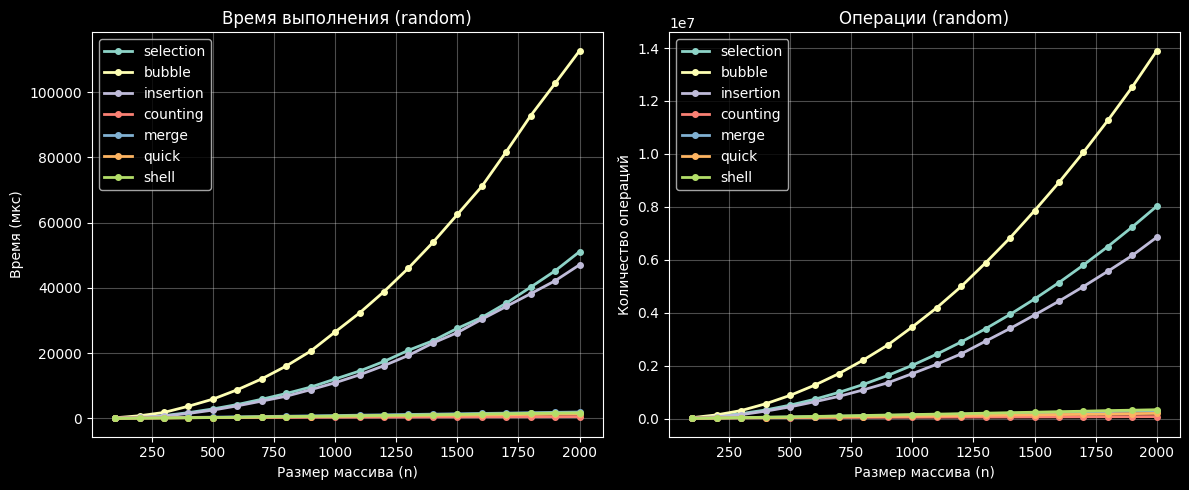

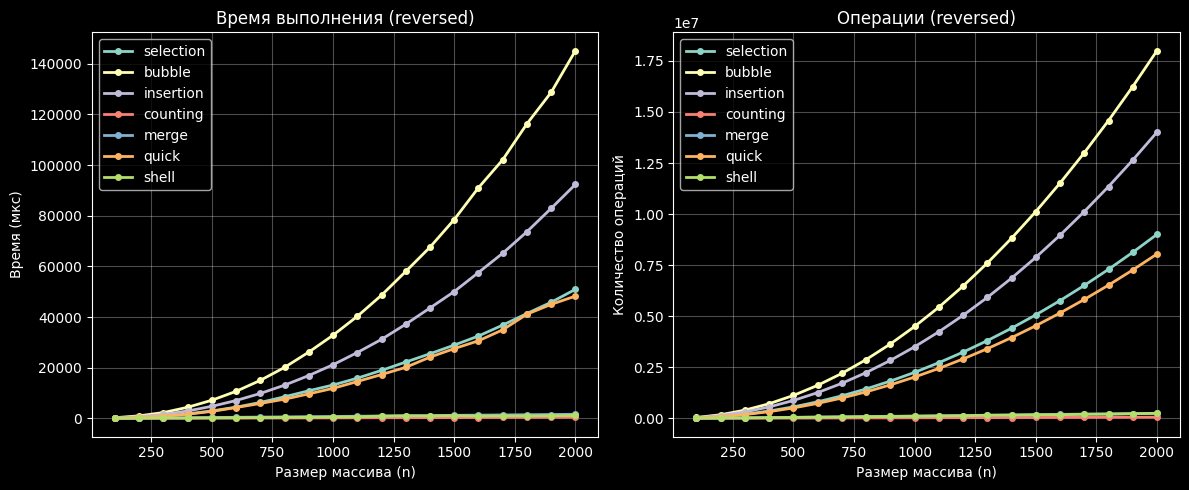

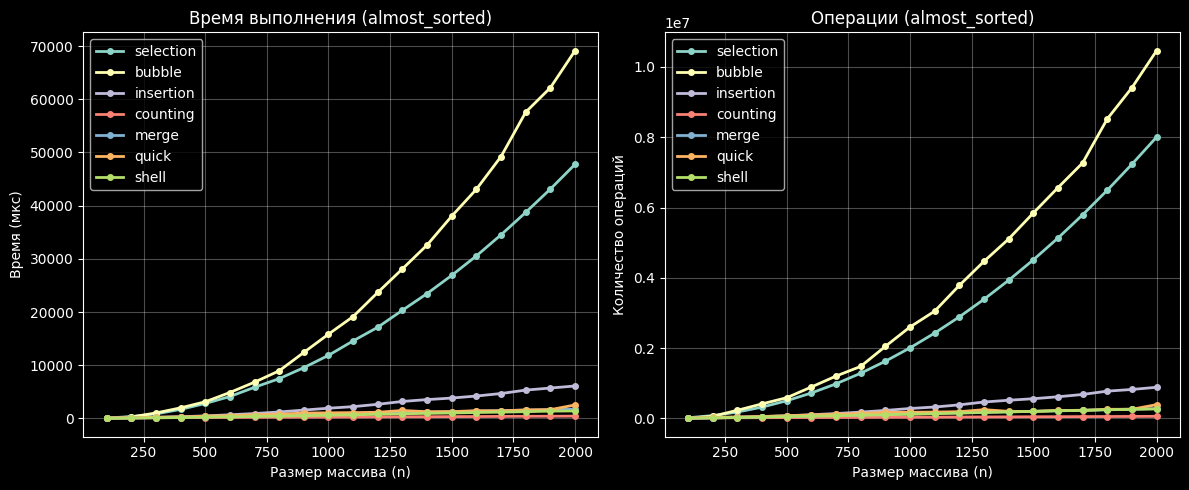

In [12]:
for arrayType in arrayTypes:
    data = df[df['array_type'] == arrayType]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    for sortName in sorts.keys():
        sortData = data[data['algorithm'] == sortName]
        plt.plot(sortData['n'], sortData['time'], marker='o', label=sortName, linewidth=2, markersize=4)
    plt.xlabel('Размер массива (n)')
    plt.ylabel('Время (мкс)')
    plt.title(f'Время выполнения ({arrayType})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    for sortName in sorts.keys():
        sortData = data[data['algorithm'] == sortName]
        plt.plot(sortData['n'], sortData['ops'], marker='o', label=sortName, linewidth=2, markersize=4)
    plt.xlabel('Размер массива (n)')
    plt.ylabel('Количество операций')
    plt.title(f'Операции ({arrayType})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'plot_{arrayType}.png', dpi=100)
    plt.show()

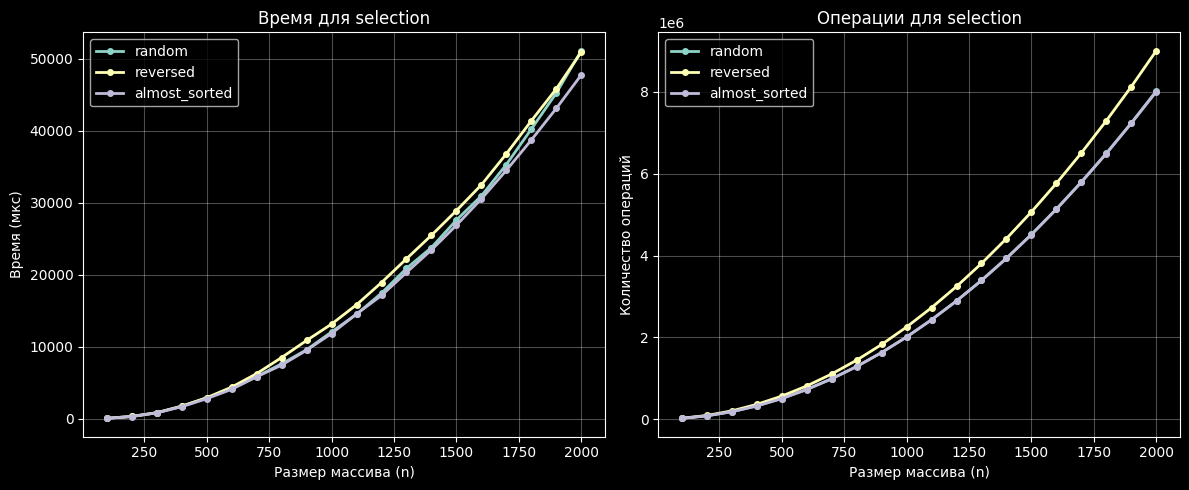

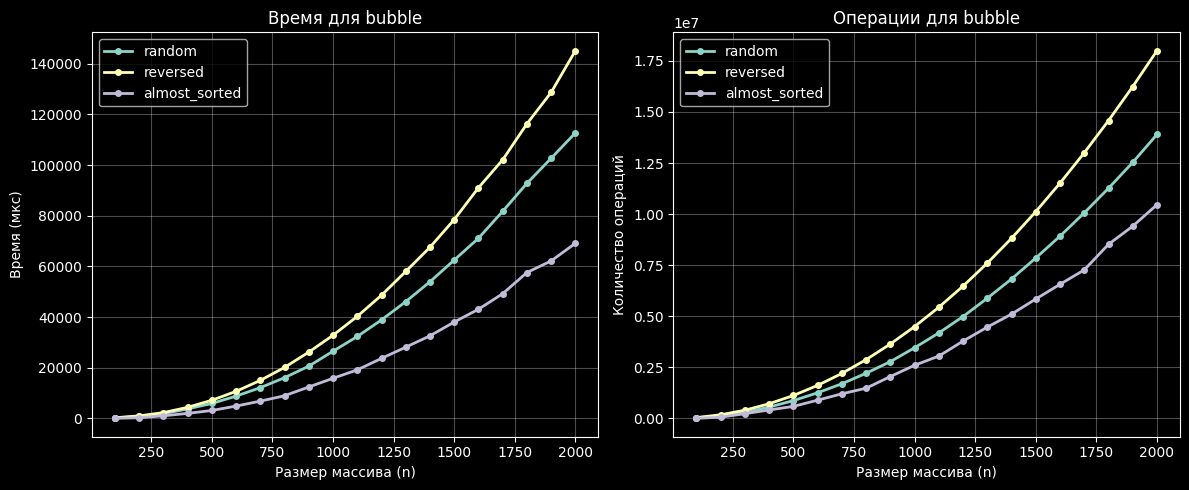

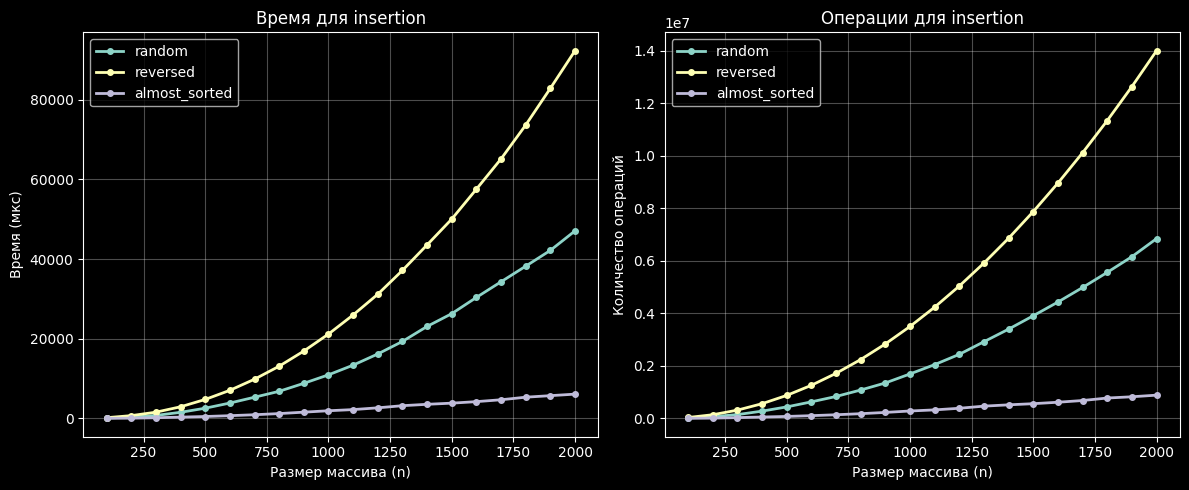

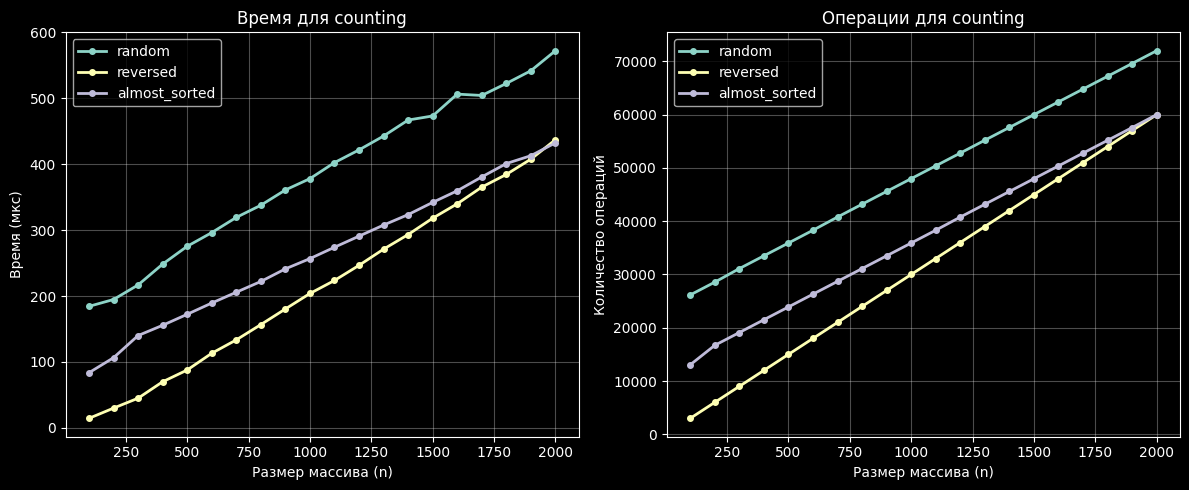

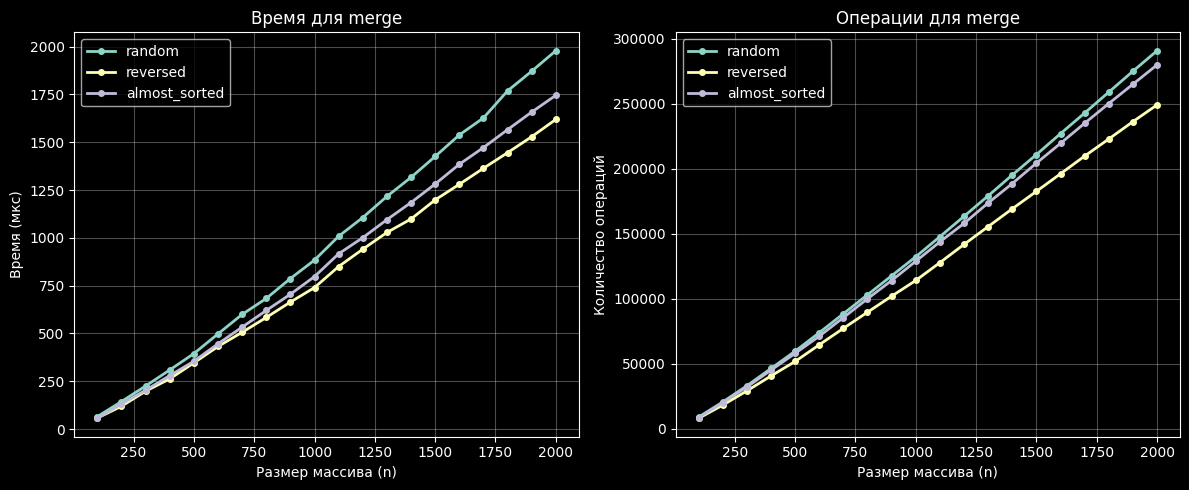

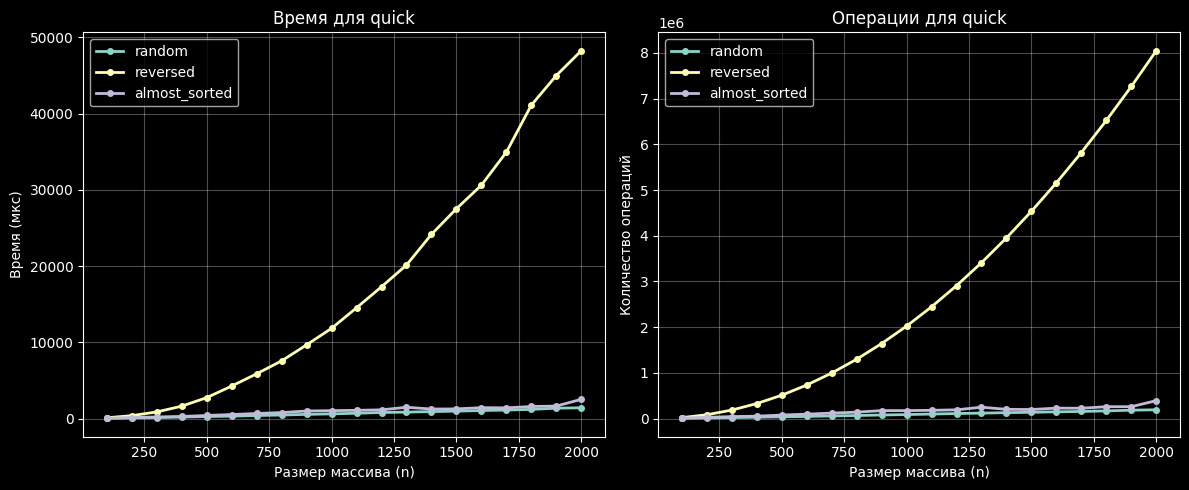

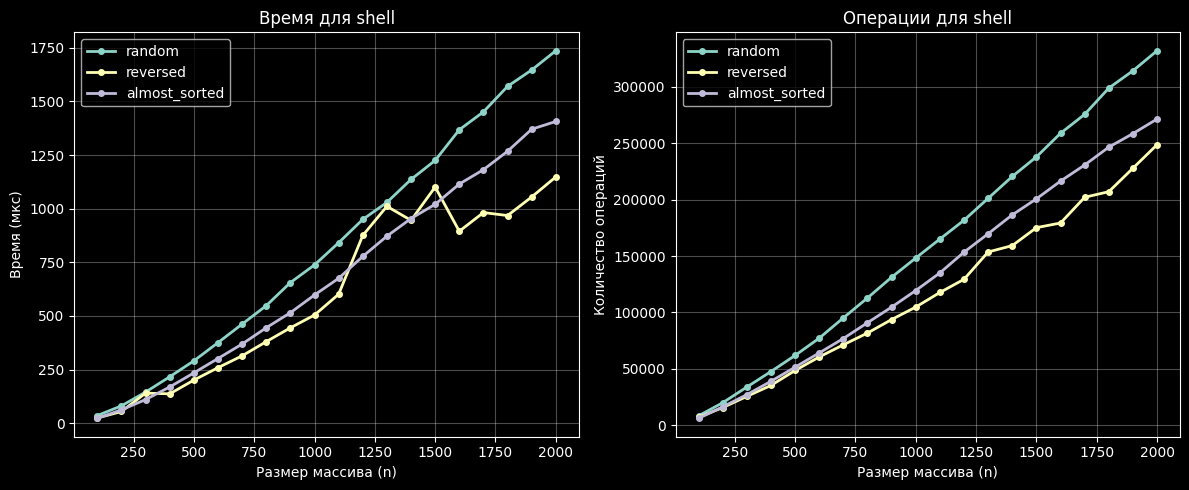

In [13]:
for sortName in sorts.keys():
    data = df[df['algorithm'] == sortName]
    
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    for arrayType in arrayTypes:
        typeData = data[data['array_type'] == arrayType]
        plt.plot(typeData['n'], typeData['time'], marker='o', label=arrayType, linewidth=2, markersize=4)
    plt.xlabel('Размер массива (n)')
    plt.ylabel('Время (мкс)')
    plt.title(f'Время для {sortName}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    for arrayType in arrayTypes:
        typeData = data[data['array_type'] == arrayType]
        plt.plot(typeData['n'], typeData['ops'], marker='o', label=arrayType, linewidth=2, markersize=4)
    plt.xlabel('Размер массива (n)')
    plt.ylabel('Количество операций')
    plt.title(f'Операции для {sortName}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'plot_{sortName}.png', dpi=100)
    plt.show()

## Анализ результатов

### Таблица асимптотических сложностей

| Алгоритм | Лучший случай | Средний случай | Худший случай | Память | Устойчивость |
|----------|---------------|----------------|---------------|---------|--------------|
| Selection Sort | O(n^2) | O(n^2) | O(n^2) | O(1) | Нет |
| Bubble Sort | O(n) | O(n^2) | O(n^2) | O(1) | Да |
| Insertion Sort | O(n) | O(n^2) | O(n^2) | O(1) | Да |
| Counting Sort | O(n+k) | O(n+k) | O(n+k) | O(n+k) | Да |
| Merge Sort | O(n log n) | O(n log n) | O(n log n) | O(n) | Да |
| Quick Sort | O(n log n) | O(n log n) | O(n^2) | O(log n) | Нет |
| Shell Sort | O(n log n) | O(n^1.3) | O(n^2) | O(1) | Нет |


## Что сделано

реализовал 7 алгоритмов сортировки (selection, bubble, insertion, counting, merge, quick, shell)

для каждого сделал две версии - для замера времени и для подсчета операций

сгенерировал три типа массивов - случайные, обратно отсортированные, почти отсортированные

провел эксперименты на размерах от 100 до 2000 с шагом 100

использовал усреднение по 50 повторам для времени

построил графики и заполнил таблицу сложностей

написал анализ результатов

## Что не сделано

не реализовал heap sort (пирамидальную) - не успел разобраться с просеиванием

не сделал TimSort - она необязательная со звездочками

### Наблюдения по графикам

на графиках видно что квадратичные сортировки (selection, bubble, insertion) растут параболически - это ожидаемо

selection sort работает одинаково на всех типах данных, потому что всегда делает одинаковое количество сравнений независимо от порядка элементов

bubble и insertion заметно быстрее на почти отсортированных массивах. insertion вообще почти линейная на таких данных, что совпадает с теорией

быстрые сортировки (merge, shell) растут логарифмически. counting самая быстрая но она работает только с целыми числами в ограниченном диапазоне

quick sort плохо работает на обратно отсортированных массивах - это из-за того что опорный элемент первый. на случайных данных она близка к merge sort
